In [55]:
from numpy import arange
from pylab import *
l = 9.8
g = l
q = .5
fd = 1.2
Omega = 2/3


def f1(theta, omega, t):
    return omega


def f2(theta, omega, t):
    return -(g/l)*sin(theta) - q*omega + fd*sin(Omega * t)


def rk4_chaotic_oscillator(theta0, omega0, f1, f2, time):

    theta = theta0
    omega = omega0

    thetapoints = []
    omegapoints = []
    tpoints = arange(0, time, .1)
    h = .1
    for t in tpoints:
        theta = theta - 2*pi if theta > pi else theta + 2*pi if theta < -1*pi else theta
        thetapoints.append(theta)
        omegapoints.append(omega)
        k1 = h * f1(theta, omega, t)
        l1 = h * f2(theta, omega, t)
        k2 = h*f1(theta+k1/2, omega+l1/2, t+h/2)
        l2 = h*f2(theta+k1/2, omega+l1/2, t+h/2)
        k3 = h*f1(theta+k2/2, omega+l2/2, t+h/2)
        l3 = h*f2(theta+k2/2, omega+l2/2, t+h/2)
        k4 = h*f1(theta+k3, omega+l3, t+h)
        l4 = h*f2(theta+k3, omega+l3, t+h)
        theta = theta + 1/6 * (k1 + 2*k2 + 2*k3 + k4)
        omega = omega + 1/6 * (l1 + 2*l2 + 2*l3 + l4)
    return thetapoints, omegapoints, tpoints

In [56]:
import random
import functools
import multiprocessing

avgs = [0]*5000

def generate_logdiff(theta0):
    thetapoints, omegapoints, tpoints = rk4_chaotic_oscillator(theta0, 0, f1, f2, 500)
    t2, o2, tp2, =  rk4_chaotic_oscillator(theta0+10**-6, 0, f1, f2, 500)
    logdiff = [log(abs(theta-t2[i])) for i, theta in enumerate(thetapoints)]
    for l, d in enumerate(logdiff):
        avgs[l] += d/100
    return logdiff, tp2

N_SIMS = 100
for _ in range(N_SIMS):
    generate_logdiff(random.uniform(2, 2.1))




0.9859842694065164


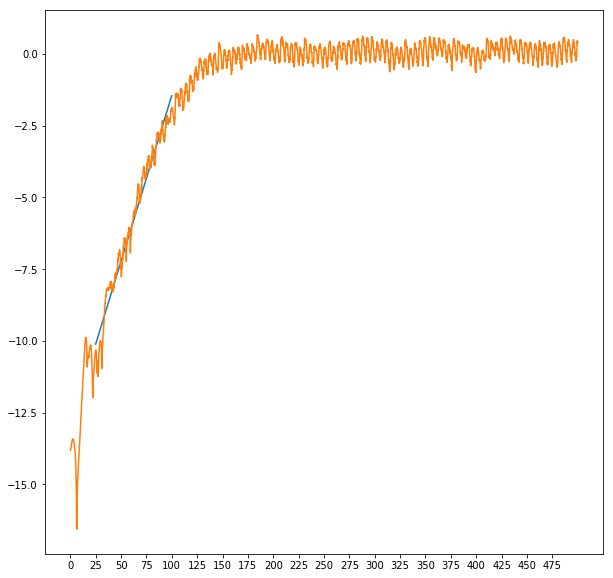

Value of L is :  0.11548997353723776


In [57]:
from scipy.stats import linregress


slope, intercept, r_value, p_value, std_err = linregress(arange(0, 500, .1)[250:1000], avgs[250:1000])
plt.figure(figsize=(10,10))
plot(arange(0, 500, .1)[250:1000], [(slope * x)+ intercept for x in arange(0, 500, .1)[250:1000]])
print(r_value)
xticks(range(0, 500, 25))
plot(arange(0, 500, .1),avgs)
show()

print("Value of L is : ", slope)